In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster

In [2]:
data = pd.read_csv("USArrests.csv")

In [3]:
data = data.drop("Unnamed: 0",axis=1)

In [4]:
data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [6]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [8]:
data.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [9]:
x=data[['Murder', 'Assault', 'UrbanPop', 'Rape']]

In [10]:
all_wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(x)
    wcss = km.inertia_
    all_wcss.append(wcss)

/home/amal/Python_projects/ICTK/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/amal/Python_projects/ICTK/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/amal/Python_projects/ICTK/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/amal/Python_projects/ICTK/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

In [11]:
all_wcss

[355807.8216,
 96399.02814449917,
 47964.26535714286,
 34728.629357142854,
 24417.023523809523,
 18768.000666666667,
 15463.473777777777,
 13329.361976190476,
 11125.03380952381,
 9884.692976190474]

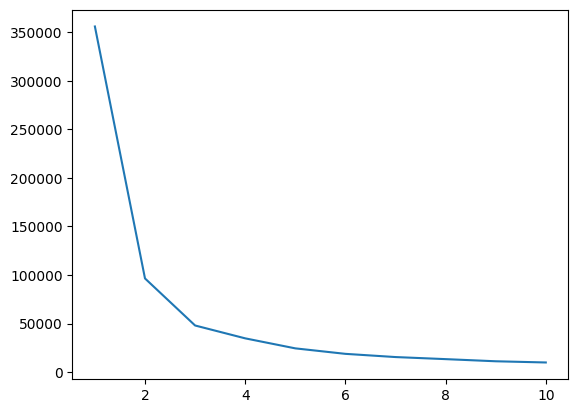

In [12]:
plt.plot(range(1,11),all_wcss)

In [13]:
km=KMeans(n_clusters=3)
km.fit(x)


/home/amal/Python_projects/ICTK/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [14]:
clusters = km.predict(x)

In [15]:
data["clusters"]=clusters

In [16]:
data

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,2
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,1


<AxesSubplot: xlabel='Murder', ylabel='UrbanPop'>

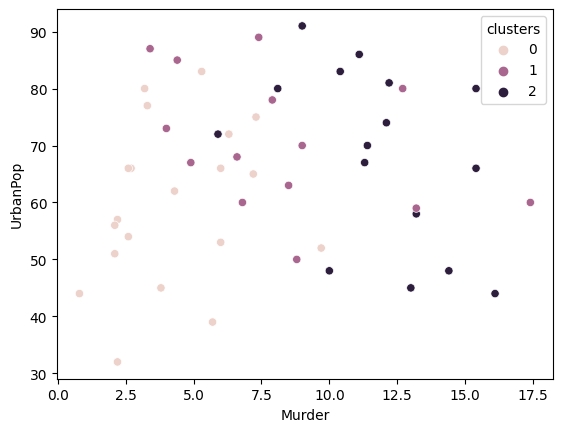

In [17]:
sns.scatterplot(x = 'Murder', y = "UrbanPop", data = data, hue = "clusters")

In [18]:
mergings = linkage(x, method = "complete")

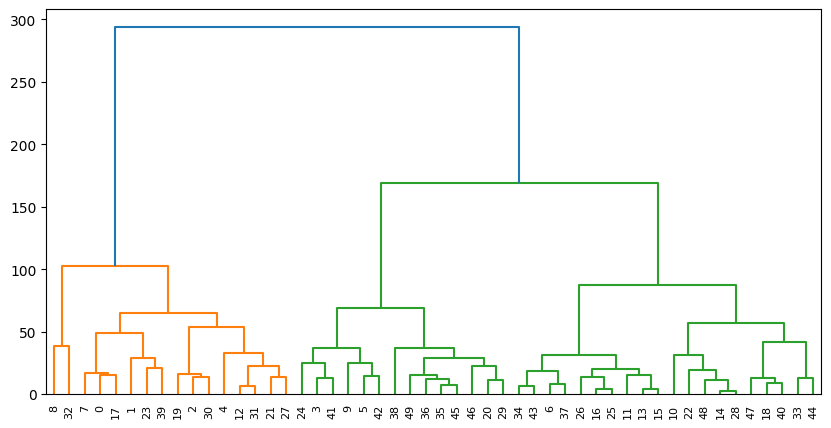

In [19]:
plt.figure(figsize=(10,5))
dendrogram(mergings)
plt.show()

In [20]:
labels = fcluster(mergings, 85, criterion='distance')

In [21]:
labels

array([2, 2, 2, 3, 2, 3, 4, 2, 1, 3, 5, 4, 2, 4, 5, 4, 4, 2, 5, 2, 3, 2,
       5, 2, 3, 4, 4, 2, 5, 3, 2, 2, 1, 5, 4, 3, 3, 4, 3, 2, 5, 3, 3, 4,
       5, 3, 3, 5, 5, 3], dtype=int32)

In [22]:
data["hc_clusters"]= labels

In [23]:
data

,Murder,Assault,UrbanPop,Rape,clusters,hc_clusters
0,13.2,236,58,21.2,2,2
1,10.0,263,48,44.5,2,2
2,8.1,294,80,31.0,2,2
3,8.8,190,50,19.5,1,3
4,9.0,276,91,40.6,2,2
5,7.9,204,78,38.7,1,3
6,3.3,110,77,11.1,0,4
7,5.9,238,72,15.8,2,2
8,15.4,335,80,31.9,2,1
9,17.4,211,60,25.8,1,3
